In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import re
!pip install -U scipy
import scipy
from scipy import stats
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')


Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scipy in /home/jovyan/.local/lib/python3.7/site-packages (1.7.1)


## Project Description
You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

## Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For **calls**, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For **web traffic**, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

#### Surf
1. Monthly charge: 20 dollars
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
   - 1 minute: 3 cents
   - 1 text message: 3 cents
   - 1 GB of data: 10 dollars

#### Ultimate
1. Monthly charge: 70 dollars
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
   - 1 minute: 1 cent
   - 1 text message: 1 cent
   - 1 GB of data: 7 dollars
   
   
## Description of Data
Remember! Megaline rounds seconds up to minutes, and megabytes to gigabytes. For **calls**, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For **web traffic**, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

The users table (data on users):
- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used   when this database was extracted)
- city — user's city of residence
- plan — calling plan name

The calls table (data on calls):
- id — unique call identifier
- call_date — call date
- duration — call duration (in minutes)
- user_id — the identifier of the user making the call

The messages table (data on texts):
- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text

The internet table (data on web sessions):
- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier

The plans table (data on the plans):
- plan_name — calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)
   

## 1. Open the data file and study the general information. 

In [2]:
try:
    users_df = pd.read_csv('megaline_users.csv')
    plans_df = pd.read_csv('megaline_plans.csv')
    messages_df = pd.read_csv('megaline_messages.csv')
    internet_df = pd.read_csv('megaline_internet.csv')
    calls_df = pd.read_csv('megaline_calls.csv')
except:
    users_df = pd.read_csv('/datasets/megaline_users.csv')
    plans_df = pd.read_csv('/datasets/megaline_plans.csv')
    messages_df = pd.read_csv('/datasets/megaline_messages.csv')
    internet_df = pd.read_csv('/datasets/megaline_internet.csv')
    calls_df = pd.read_csv('/datasets/megaline_calls.csv')

In [3]:
megaline_datasets = {"calls_df":calls_df, "internet_df":internet_df, "messages_df":messages_df, "plans_df":plans_df, "users_df":users_df}

In [4]:
for name, ds in megaline_datasets.items():
    f"{name} {ds.shape}"

'calls_df (137735, 4)'

'internet_df (104825, 4)'

'messages_df (76051, 3)'

'plans_df (2, 8)'

'users_df (500, 8)'

In [5]:
for name, ds in megaline_datasets.items():
    f"{name}"
    ds.info()

'calls_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


'internet_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


'messages_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


'plans_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


'users_df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## 2. Prepare the Data

- Convert the data to the necessary types
- Find and eliminate errors in the data
- Explain what errors you found and how you removed them.

For each user, find:
- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [6]:
for name, ds in megaline_datasets.items():
    f"{name}"
    ds.sample(2)

'calls_df'

,id,user_id,call_date,duration
108482,1382_1891,1382,2018-09-11,2.28
112504,1397_54,1397,2018-09-11,2.14


'internet_df'

,id,user_id,session_date,mb_used
21343,1099_96,1099,2018-05-02,232.15
56890,1257_157,1257,2018-06-21,0.00


'messages_df'

,id,user_id,message_date
40180,1259_231,1259,2018-05-14
43497,1287_171,1287,2018-12-20


'plans_df'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


'users_df'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
342,1342,Eugene,Patton,65,"Indianapolis-Carmel-Anderson, IN MSA",2018-10-21,surf,NaN
370,1370,Nenita,Vasquez,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-09-12,ultimate,NaN


As we can see some columns columns have the object(str) data type. We are going to change these columns to the correct data types.

In [7]:
calls_df["call_date"] = pd.to_datetime(calls_df["call_date"], format='%Y-%m-%d')
internet_df["session_date"] = pd.to_datetime(internet_df["session_date"], format='%Y-%m-%d')
messages_df["message_date"] = pd.to_datetime(messages_df["message_date"], format='%Y-%m-%d')
users_df["reg_date"] = pd.to_datetime(users_df["reg_date"], format='%Y-%m-%d')
users_df["churn_date"] = pd.to_datetime(users_df["churn_date"], format='%Y-%m-%d')

Now we are going to check for missing data in these datasets by using a missing ratio.

In [8]:
def missing_values(df):
  df_nulls=pd.concat([df.dtypes, df.isna().sum(), df.isna().sum()/len(df)], axis=1)
  df_nulls.columns = ["type","count","missing_ratio"]
  df_nulls=df_nulls[df_nulls["count"]>0]
  df_nulls.sort_values(by="missing_ratio", ascending=False)
  return df_nulls

In [9]:
for name, ds in megaline_datasets.items():
  print(name)
  missing_values(ds)

calls_df


,type,count,missing_ratio


internet_df


,type,count,missing_ratio


messages_df


,type,count,missing_ratio


plans_df


,type,count,missing_ratio


users_df


,type,count,missing_ratio
churn_date,datetime64[ns],466,0.932


In the megaline_users dataset there is over 93% data missing in the *churn_date* column. This does not cause me to be alarmed because the *churn_date* is the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted). That means users are still using the service. We will use the data from the *churn_date* column to create a new column called *used_days* and we will delete the *churn_date* with all the missing data.

In [10]:
users_df.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [11]:
users_df.loc[users_df["churn_date"].isna(), "churn_date"] = pd.datetime.now().date()
users_df["churn_date"] = pd.to_datetime(users_df["churn_date"], format='%Y-%m-%d')
users_df["used_days"] = (users_df["churn_date"]-users_df["reg_date"]).dt.days
users_df = users_df.drop(["churn_date"], axis=1)

In [12]:
def describe_full(df):
    data_describe = df.describe().T
    df_numeric=df._get_numeric_data()
    dtype_df=df_numeric.dtypes
    data_describe['dtypes']=dtype_df
    data_null = df_numeric.isnull().sum()/len(df) * 100
    data_describe['Missing %']=data_null
    Cardinality=df_numeric.apply(pd.Series.nunique)
    data_describe['Cardinality']=Cardinality
    df_skew=df_numeric.skew(axis = 0, skipna = True) 
    data_describe['Skew']=df_skew
    return data_describe

In [13]:
for name, ds in megaline_datasets.items():
  print(name)
  describe_full(ds)

calls_df


,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew
user_id,137735.0,1247.658046,139.416268,1000.0,1128.00,1247.00,1365.00,1499.0,int64,0.0,481,0.010325
duration,137735.0,6.745927,5.839241,0.0,1.29,5.98,10.69,37.6,float64,0.0,2802,0.693502


internet_df


,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew
user_id,104825.0,1242.496361,142.053913,1000.0,1122.00,1236.00,1367.00,1499.00,int64,0.0,489,0.080268
mb_used,104825.0,366.713701,277.170542,0.0,136.08,343.98,554.61,1693.47,float64,0.0,57624,0.532269


messages_df


,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew
user_id,76051.0,1245.972768,139.843635,1000.0,1123.0,1251.0,1362.0,1497.0,int64,0.0,402,0.042754


plans_df


,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew
messages_included,2.0,525.00,671.751442,50.00,287.500,525.00,762.500,1000.00,int64,0.0,2,NaN
mb_per_month_included,2.0,23040.00,10861.160159,15360.00,19200.000,23040.00,26880.000,30720.00,int64,0.0,2,NaN
minutes_included,2.0,1750.00,1767.766953,500.00,1125.000,1750.00,2375.000,3000.00,int64,0.0,2,NaN
usd_monthly_pay,2.0,45.00,35.355339,20.00,32.500,45.00,57.500,70.00,int64,0.0,2,NaN
usd_per_gb,2.0,8.50,2.121320,7.00,7.750,8.50,9.250,10.00,int64,0.0,2,NaN
usd_per_message,2.0,0.02,0.014142,0.01,0.015,0.02,0.025,0.03,float64,0.0,2,NaN
usd_per_minute,2.0,0.02,0.014142,0.01,0.015,0.02,0.025,0.03,float64,0.0,2,NaN


users_df


,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0,int64,0.0,500,0.000000
age,500.0,45.486,16.972269,18.0,30.00,46.0,61.00,75.0,int64,0.0,58,0.040081
used_days,500.0,1114.180,282.518497,7.0,1077.25,1178.5,1267.00,1360.0,int64,0.0,286,-2.749921


#### Call duration
Let's round up all calls to minutes as per the company's policy.

In [14]:
calls_df['total_min_month'] = np.ceil((calls_df['duration'].values))

#### Duplicates
Let's check if any rows are duplicated in any data frames.

In [15]:
result = []
for df in [users_df, messages_df, calls_df, internet_df]:
    print(result.append(df.duplicated().sum()))

None
None
None
None


In [16]:
(calls_df['duration'] == 0).sum()*100/len(calls_df)

19.48233927469416

In [17]:
(internet_df['mb_used'] == 0).sum()*100/len(calls_df)

9.98076015537082

In the *duration* column in our calls_df data frame has 19.48% zero values which could throw off our true understanding of this analysis.

In the *mb_used* column in our internet_df data frame has ~10% zero values which could throw off our true understanding on this analysis. 

To deal with these issues, for both columns, I will fill the zero values in these columns with the mean value of each column.

In [18]:
calls_df['duration'] = calls_df['duration'].replace(0, calls_df['duration'].mean())

In [19]:
(calls_df['duration'] == 0).sum()*100/len(calls_df)

0.0

In [20]:
internet_df['mb_used'] = internet_df['mb_used'].replace(0, internet_df['mb_used'].mean())

In [21]:
(internet_df['mb_used'] == 0).sum()*100/len(calls_df)

0.0

### Calculations
#### For each user, find:
- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

#### Calls per month
To calculate the number of calls made and minutes used per month for each user, first we will extract month from the *call_date* column and then make a pivot table grouping by *user_id* and *call_month*.

In [22]:
calls_df['month'] = calls_df['call_date'].dt.month

In [23]:
calls_per_month = calls_df.pivot_table(index=['user_id','month'], values='total_min_month', aggfunc='sum')
calls_per_month = calls_per_month.reset_index()

In [24]:
calls_per_month.columns = ["user_id","month","total_min_month"]

In [25]:
calls_per_month.head()

,user_id,month,total_min_month
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


#### Messages per month
To calculate the number of text messages per month for each user, first we will extract month from the message_date column and then make a pivot table grouping by *user_id* and *message_month*.

In [26]:
messages_df['month'] = messages_df['message_date'].dt.month

In [27]:
messages_per_month = messages_df.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
messages_per_month = messages_per_month.reset_index()
messages_per_month.columns = ['user_id','month','num_messages_month']

In [28]:
messages_per_month.head()

,user_id,month,num_messages_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


#### Volume of data per month
To calculate the volume of data per month for each user, first we will extract month from the session_date column and then make a pivot table grouping by *user_id* and *session_month*. For web traffic, the total volume in megabytes for the month is rounded up.

In [29]:
internet_df['month'] = internet_df['session_date'].dt.month

In [30]:
sessions_per_month = internet_df.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
sessions_per_month = sessions_per_month.reset_index()

sessions_per_month.columns = ['user_id', 'month', "mb_volume_month"]
sessions_per_month['gb_volume_month'] = np.ceil((sessions_per_month['mb_volume_month'].values) / 1024).astype(int)

In [31]:
sessions_per_month.head()

,user_id,month,mb_volume_month,gb_volume_month
0,1000,12,2268.183701,3
1,1001,8,8386.004804,9
2,1001,9,18082.098113,18
3,1001,10,25264.199608,25
4,1001,11,19604.441103,20


#### Monthly profit from each user
To calculate this we will subtract the free package limit from the total number of calls, text messages, and data. Then we will multiply the result by the calling plan value and add the monthly charge depending on the calling plan.

In [32]:
user_plan = users_df[['user_id','plan','city']]
user_plan = user_plan.merge(plans_df, left_on='plan', right_on='plan_name', how = 'outer')

In [33]:
df_monthly = (calls_per_month
              .merge(messages_per_month, how='outer', on=['user_id','month'])
              .merge(sessions_per_month, how='outer', on=['user_id','month'])
              .merge(user_plan, on='user_id', how = 'outer')
             )

In [34]:
df_monthly.head()

,user_id,month,total_min_month,num_messages_month,mb_volume_month,gb_volume_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,124.0,11.0,2268.183701,3.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8.0,182.0,30.0,8386.004804,9.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,9.0,315.0,44.0,18082.098113,18.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,10.0,393.0,53.0,25264.199608,25.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,11.0,426.0,36.0,19604.441103,20.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf


In [35]:
df_monthly.isnull().sum()

user_id                    0
month                     10
total_min_month           45
num_messages_month       497
mb_volume_month           26
gb_volume_month           26
plan                       0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

We have a few null values for those users who only used 1 or 2 services - e.g. only messages and the internet but not calls and so on. We will thus replace these values with 0.

In [36]:
for col in ['total_min_month','num_messages_month','mb_volume_month','gb_volume_month']:
    df_monthly[col] = df_monthly[col].fillna(0)

Finally, let's calculate the monthly profit per user according to the below function:

In [37]:
def calc_revenue(row):
    minutes = row['total_min_month']
    gb = row['gb_volume_month']
    plan = row['plan']
    revenue = 0
    revenue += max(0, minutes - plans.loc[plan, 'minutes_included']) * plans.loc[plan, 'usd_per_minute']
    revenue += max(0, messages -plans.loc[plan, 'messages_included']) * plans.loc[plan, 'usd_per_message']
    revenue += max(0, gb-plans.loc[plan, 'gb_per_month_included']) * plans.loc[plan, 'usd_per_gb']
    revenue += plans.loc[plan, 'usd_monthly_pay']
    return revenue

In [38]:
df_monthly

,user_id,month,total_min_month,num_messages_month,mb_volume_month,gb_volume_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,124.0,11.0,2268.183701,3.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8.0,182.0,30.0,8386.004804,9.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,9.0,315.0,44.0,18082.098113,18.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,10.0,393.0,53.0,25264.199608,25.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,11.0,426.0,36.0,19604.441103,20.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,0.0,0.0,0.000000,0.0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,500,20,10,0.03,0.03,surf
2299,1307,NaN,0.0,0.0,0.000000,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf
2300,1319,NaN,0.0,0.0,0.000000,0.0,surf,"Colorado Springs, CO MSA",50,15360,500,20,10,0.03,0.03,surf
2301,1378,NaN,0.0,0.0,0.000000,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,500,20,10,0.03,0.03,surf


We will now group the table per plan and per month and visualize the results.

In [39]:
total_profit_month_plan = df_monthly.groupby(['plan','month'])['usd_monthly_pay'].sum().reset_index()

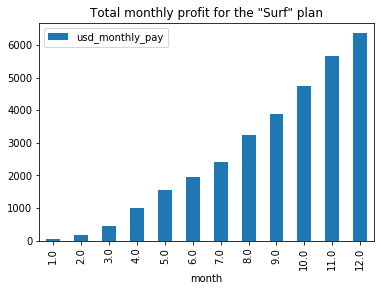

In [40]:
plan_surf = total_profit_month_plan.query('plan == "surf"').plot(y='usd_monthly_pay', x='month', kind='bar')
plt.title('Total monthly profit for the "Surf" plan');

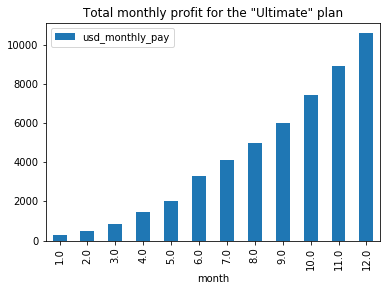

In [41]:
plan_ultimate = total_profit_month_plan.query('plan == "ultimate"').plot(y='usd_monthly_pay', x='month', kind='bar')
plt.title('Total monthly profit for the "Ultimate" plan');

We see that both the "Surf" and "Ultimate" plans are mostly profitable throughout the year with a tendency of being more and more profit-making towards the end of the year. It appears that the "Ultimate" plan is even more profitable than the "Surf" plan.

### Summary
After going through the initial look at the general information for the data, we saw that we didn't have a whole log of missing data. What we were missing was the *churn_date* column that wasn't filled out due to the fact that on the extraction date of the dataset users were still using Megaline services. To combat this, we created a new column called *used_days* which could still give us information on how long the customer has been loyal to Megaline. *churn_date* was then subsequently dropped from our table. Datetime columns were then converted to the necessary format. Calculations were also made and placed in new columns to represent for each user:

1. The number of calls made and minutes used per month
2. The number of text messages sent per month
3. The volume of data per month
4. The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan

## 3. Analyze the Data
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions.

#### Distribution analysis
Now we are going to further compare the two plans, so let's create separate data frames for them.

In [42]:
df_surf = df_monthly[df_monthly['plan'] == 'surf']
df_ultimate = df_monthly[df_monthly['plan'] == 'ultimate']

In [43]:
df_ultimate.shape

(724, 16)

In [44]:
df_surf.shape

(1579, 16)

##### Calls

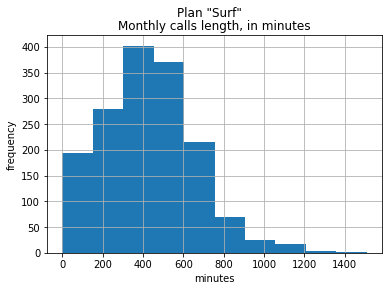

In [45]:
df_surf.hist('total_min_month')
plt.title('Monthly calls length, in minutes')
plt.suptitle('Plan "Surf"')
plt.xlabel('minutes')
plt.ylabel('frequency');

In [46]:
print('Average monthly calls length in minutes, plan "Surf": {:.0f}'.format(df_surf['total_min_month'].mean()))
print('Medium monthly calls length in minutes, plan "Surf":{:.0f}'.format(df_surf['total_min_month'].median()))
print('Standard deviation for monthly calls length in minutes, plan "Surf":{:.0f}'.format(df_surf['total_min_month'].std()))

Average monthly calls length in minutes, plan "Surf": 427
Medium monthly calls length in minutes, plan "Surf":424
Standard deviation for monthly calls length in minutes, plan "Surf":235


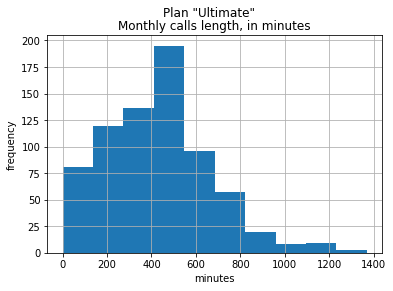

In [47]:
df_ultimate.hist('total_min_month')
plt.title('Monthly calls length, in minutes')
plt.suptitle('Plan "Ultimate"')
plt.xlabel('minutes')
plt.ylabel('frequency');

In [48]:
print('Average monthly calls length in minutes, plan "Ultimate": {:.0f}'.format(df_ultimate['total_min_month'].mean()))
print('Medium monthly calls length in minutes, plan "Ultimate":{:.0f}'.format(df_ultimate['total_min_month'].median()))
print('Standard deviation for monthly calls length in minutes, plan "Ultimate":{:.0f}'.format(df_ultimate['total_min_month'].std()))

Average monthly calls length in minutes, plan "Ultimate": 428
Medium monthly calls length in minutes, plan "Ultimate":422
Standard deviation for monthly calls length in minutes, plan "Ultimate":242


Average and medium monthly calls length is almost the same (around 430-440 minutes per month) for both plans, which is a sign of a distribution close to normal, without any heavy tails. Standard deviations are also quite close (around 230-240 minutes).

In [49]:
print('People exceeded the "Surf" plan limit for calls: {:.0f}'.format(len(df_surf.query('total_min_month > 500'))))
print('Ratio of people exceeded the "Surf" plan limit for calls: {:.0%}'.format(len(df_surf.query('total_min_month > 500')) / len(df_surf)))

People exceeded the "Surf" plan limit for calls: 566
Ratio of people exceeded the "Surf" plan limit for calls: 36%


The "Surf" plan limit is 500 minutes per month. This value is close to the mean and median, so most users stay within this limit while others - 566 people (36%) which is almost a half! - exceed it. Those who exceed the limit create profit for the company. The "Ultimate" plan limit is 3000 minutes per month. No user is spending that many minutes - the highest number is even less than 1400 minutes per month. This is where the company looses much profit, so this limit must be reviewed.

##### Messages

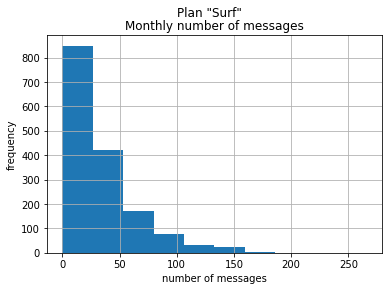

In [50]:
df_surf.hist('num_messages_month')
plt.title('Monthly number of messages')
plt.suptitle('Plan "Surf"')
plt.xlabel('number of messages')
plt.ylabel('frequency');

In [51]:
print('Average monthly number of messages, plan "Surf": {:.0f}'.format(df_surf['num_messages_month'].mean()))
print('Medium monthly number of messages, plan "Surf":{:.0f}'.format(df_surf['num_messages_month'].median()))
print('Standard deviation for monthly number of messages, plan "Surf":{:.0f}'.format(df_surf['num_messages_month'].std()))

Average monthly number of messages, plan "Surf": 31
Medium monthly number of messages, plan "Surf":24
Standard deviation for monthly number of messages, plan "Surf":34


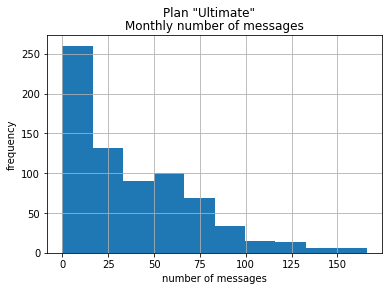

In [52]:
df_ultimate.hist('num_messages_month')
plt.title('Monthly number of messages')
plt.suptitle('Plan "Ultimate"')
plt.xlabel('number of messages')
plt.ylabel('frequency');

In [53]:
print('Average monthly number of messages, plan "Ultimate": {:.0f}'.format(df_ultimate['num_messages_month'].mean()))
print('Medium monthly number of messages, plan "Ultimate":{:.0f}'.format(df_ultimate['num_messages_month'].median()))
print('Standard deviation for monthly number of messages, plan "Ultimate":{:.0f}'.format(df_ultimate['num_messages_month'].std()))

Average monthly number of messages, plan "Ultimate": 37
Medium monthly number of messages, plan "Ultimate":30
Standard deviation for monthly number of messages, plan "Ultimate":35


Both plans show the same picture: these distributions are positively skewed, standard deviation is quite large, almost the same as the mean. There are slightly - around 10 messages per month - less in the "Surf" plan which is only logical as users of this plan have a lower limit, so they are probably trying to stay inside the boundaries by sending less messages.

In [54]:
print('People exceeded the "Surf" plan limit for messages: {:.0f}'.format(len(df_surf.query('num_messages_month > 50'))))
print('Ratio of people exceeded the "Surf" plan limit for messages: {:.0%}'.format(len(df_surf.query('num_messages_month > 50')) / len(df_surf)))

People exceeded the "Surf" plan limit for messages: 340
Ratio of people exceeded the "Surf" plan limit for messages: 22%


The "Surf" plan limit is 50 messages per month. Most users stay within this limit while others - 340 people (22%) - exceed it. Those who exceed the limit create profit for the company. The "Ultimate" plan limit is 1000 messages per month. No user is sending that many texts - the highest number is only 150 messages per month. This is where the company looses much profit, so this limit must be reviewed.

##### Internet

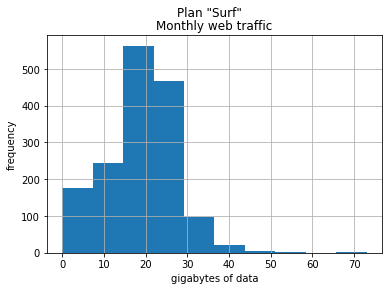

In [55]:
df_surf.hist('gb_volume_month')
plt.title('Monthly web traffic')
plt.suptitle('Plan "Surf"')
plt.xlabel('gigabytes of data')
plt.ylabel('frequency');

In [56]:
print('Average monthly volume of data, plan "Surf": {:.0f}'.format(df_surf['gb_volume_month'].mean()))
print('Medium monthly volume of data, plan "Surf":{:.0f}'.format(df_surf['gb_volume_month'].median()))
print('Standard deviation for monthly volume of data, plan "Surf":{:.0f}'.format(df_surf['gb_volume_month'].std()))

Average monthly volume of data, plan "Surf": 19
Medium monthly volume of data, plan "Surf":19
Standard deviation for monthly volume of data, plan "Surf":9


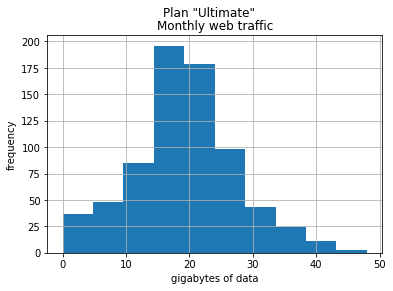

In [57]:
df_ultimate.hist('gb_volume_month')
plt.title('Monthly web traffic')
plt.suptitle('Plan "Ultimate"')
plt.xlabel('gigabytes of data')
plt.ylabel('frequency');

In [58]:
print('Average monthly volume of data, plan "Ultimate": {:.0f}'.format(df_ultimate['gb_volume_month'].mean()))
print('Medium monthly volume of data, plan "Ultimate":{:.0f}'.format(df_ultimate['gb_volume_month'].median()))
print('Standard deviation for monthly volume of data, plan "Ultimate":{:.0f}'.format(df_ultimate['gb_volume_month'].std()))

Average monthly volume of data, plan "Ultimate": 19
Medium monthly volume of data, plan "Ultimate":19
Standard deviation for monthly volume of data, plan "Ultimate":8


The distributions of both plans are very similar: measures of location and dispersion are almost identical. The mean and median are very close (around 17-18 gb per month) which is a sign of a distribution close to normal. Standard deviation is not so large either - 8 gb. The number of observations with a mean/median volume is more than twice as large as the rest of values, that's why the picks of both histograms are so distinctive.

In [59]:
print('People exceeded the "Surf" plan limit for web traffic: {:.0f}'.format(len(df_surf.query('gb_volume_month > 16'))))
print('Ratio of people exceeded the "Surf" plan limit for web traffic: {:.0%}'.format(len(df_surf.query('gb_volume_month > 16')) / len(df_surf)))

People exceeded the "Surf" plan limit for web traffic: 1039
Ratio of people exceeded the "Surf" plan limit for web traffic: 66%


In [60]:
print('People exceeded the "Ultimate" plan limit for web traffic: {:.0f}'.format(len(df_ultimate.query('gb_volume_month > 31'))))
print('Ratio of people exceeded the "Ultimate" plan limit for web traffic: {:.0%}'.format(len(df_ultimate.query('gb_volume_month > 31')) / len(df_surf)))

People exceeded the "Ultimate" plan limit for web traffic: 49
Ratio of people exceeded the "Ultimate" plan limit for web traffic: 3%


The "Surf" plan's data limit is 16 gb which is slightly less than the average usage. Almost a half of users stay within this limit while others - 858 people (55%) - exceed it. Those who exceed the limit create profit for the company. As the number of people who exceed the limit is significant, profit from the internet source is probably the biggest among other sources for this plan.

The "Ultimate" plan's data limit is 31 gb. There are only 39 people (2%) who exceeded this number, hence the data limit for this plan should be reconsidered.

##### Outliers
##### Calls

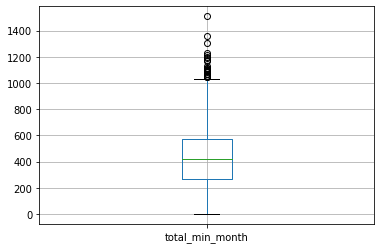

In [61]:
df_surf.boxplot('total_min_month');

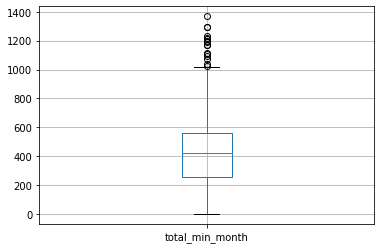

In [62]:
df_ultimate.boxplot('total_min_month');

##### Messages

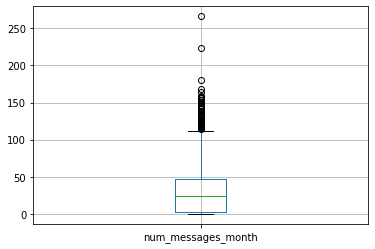

In [63]:
df_surf.boxplot('num_messages_month');

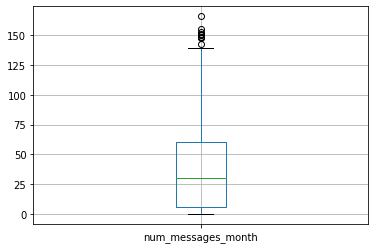

In [64]:
df_ultimate.boxplot('num_messages_month');

##### Internet

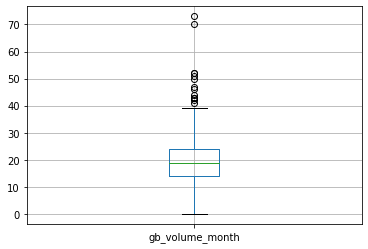

In [65]:
df_surf.boxplot('gb_volume_month');

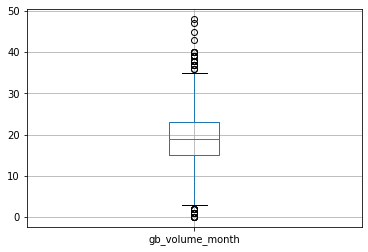

In [66]:
df_ultimate.boxplot('gb_volume_month');

According to the above boxplots, we see that distributions for both plans and for both total_min_month and gb_volume_month variables are close to normal, whereas it is positively skewed for the num_messages_month variable. However we only see outliers above the upper whisker for all 3 variables and both plans. We will hence apply the Interquartile range method in order to remove them.

##### Outliers removal
First, let's calculate the upper whisker for each plan and for each variable.

In [67]:
df_surf.name = "Surf"
df_ultimate.name = "Ultimate"
for df in [df_surf,df_ultimate]:
    print()
    print(df.name)
    for feature in ['total_min_month','gb_volume_month','num_messages_month']:
        df[feature] = df[feature].astype(int)
        q25 = df[feature].quantile(0.25)
        q75 = df[feature].quantile(0.75)
        iqr = q75 - q25
        # calculate the outlier cutoff and upper limit
        cut_off = iqr * 1.5
        upper = q75 + cut_off
        print(feature, upper)


Surf
total_min_month 1036.5
gb_volume_month 39.0
num_messages_month 113.0

Ultimate
total_min_month 1022.5
gb_volume_month 35.0
num_messages_month 141.625


Next, we will only keep those rows for which each variable is under the upper limit.

In [68]:
df_surf = df_surf[(df_surf['total_min_month']<1032.0) & (df_surf['gb_volume_month']<34.5) & (df_surf['num_messages_month']<113.0)]
df_surf.shape

(1469, 16)

In [69]:
df_ultimate = df_ultimate[(df_ultimate['total_min_month']<1023.125) & (df_ultimate['gb_volume_month']<35.5) & (df_ultimate['num_messages_month']<142.0)]
df_ultimate.shape

(673, 16)

## 4. Test the Hypotheses
1. The average revenue from users of Ultimate and Surf calling plans differs.
 - Null hypothesis: Average profit of two plans are not different (Var(X) == Var(Y)).
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.
 - Null hypothesis: Average profit from NY-NJ area is not different from other regions (Var(X) == Var(Y)).
You decide what alpha value to use.

Explain:
1. How you formulated the null and alternative hypotheses.
2. What criterion you used to test the hypotheses and why.

**The average profit from users of Ultimate and Surf plans differs: bilateral hypothesis
Step 1: the null and alternative hypotheses**

**H0**: The means of two statistical populations are equal. In our case it means that the average profit from users of "Surf" and "Ultimate" plans is the same.

**H1**: The means of two statistical populations are not equal. In our case it means that the average profit from users of "Surf" and "Ultimate" plans differs, although we do not specify here which one is more.

**Step 2: Set the criteria for a decision**
In behavioral science, the level of significance is typically set at 5% and we will choose this criteria as well. When the probability of obtaining a sample mean is less than 5% if the null hypothesis were true, then we reject the value stated in the null hypothesis.

**Step 3: Compute the test statistic**
In order to test our hypothesis that the means of two statistical populations are equal based on samples taken from them, we will apply the method scipy.stats.ttest_ind().

The method takes the following parameters:
- array1, array2 are arrays containing the samples. We will use the monthly_profit variables we calculated earlier for both plans;
- equal_var is an optional parameter that specifies whether or not the variances of the populations should be considered equal. To set this parameter let's test whether the variances of our samples are the same.

In [70]:
sample_1 = df_surf['usd_monthly_pay']
sample_2 = df_ultimate['usd_monthly_pay']

In [71]:
stats.levene(sample_1, sample_2)

LeveneResult(statistic=nan, pvalue=nan)

The small p-value suggests that the populations do not have equal variances. Hence we will set the equal_var parameter to False.

In [72]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = stats.ttest_ind(
                        sample_1, 
                        sample_2, 
                        equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  0.0
We reject the null hypothesis


**Step 4: Make a decision**
Based on the results of the test statistic we reach significance: the decision is to reject the null hypothesis. The equality of samples' means is associated with a low probability of occurrence (much less than 1%) when the null hypothesis is true.

Now let's see if this decision stands if we reformulate the alternative hypothesis, so it becomes unilateral.

**The average profit from users of Ultimate and Surf plans differs: unilateral hypothesis**

**The "Surf" plan's average profit is greater than the "Ultimate" plan's average profit**

**Step 1: the null and alternative hypotheses**

**H0**: The means of two statistical populations are equal. In our case it means that the average profit from users of "Surf" and "Ultimate" plans is the same.

**H1**: One of the means of two statistical populations is greater than the other. In our case it means that the average profit from users of the "Surf" plan is greater than that of the "Ultimate" plan.

**Step 2: Set the criteria for a decision**
We will keep the level of significance at 5% for this test as well.

**Step 3: Compute the test statistic**
In order to test our new hypothesis we will also apply the method scipy.stats.ttest_ind(). The first 3 parameters stay the same and we will add one more for unilateral hypotheses:

- alternative is an optional parameter that defines the alternative hypothesis. The following options are available (default is ‘two-sided’). In this section we will set it to 'greater' for our purposes.

In [73]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = stats.ttest_ind(
                        sample_1, 
                        sample_2,
                        equal_var=False,
                        alternative='greater')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  1.0
We retain the null hypothesis


**Step 4: Make a decision**
Based on the results of the test statistic we reach significance: the decision is to reject the null hypothesis. The equality of samples' means is associated with a low probability of occurrence (much less than 1%) when the null hypothesis is true.

Now let's see what results we would get if we changed again the alternative hypothesis.

**The average profit from users of Ultimate and Surf plans differs: unilateral hypothesis**

**The "Surf" plan's average profit is less than the "Ultimate" plan's average profit

**Step 1: the null and alternative hypotheses**

**H0**: The means of two statistical populations are equal. In our case it means that the average profit from users of "Surf" and "Ultimate" plans is the same.

**H1**: One of the means of two statistical populations is less than the other. In our case it means that the average profit from users of the "Surf" plan is less than that of the "Ultimate" plan.

**Step 2: Set the criteria for a decision**
We will keep the level of significance at 5% for this test as well.

**Step 3: Compute the test statistic**
In order to test our new hypothesis we will also apply the method scipy.stats.ttest_ind(). The first 3 parameters stay the same and we will add one more for unilateral hypotheses:

- alternative is an optional parameter that defines the alternative hypothesis. The following options are available (default is ‘two-sided’). In this section we will set it to 'less' for our purposes.

In [74]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = stats.ttest_ind(
                        sample_1, 
                        sample_2,
                        equal_var=False,
                        alternative='less')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  0.0
We reject the null hypothesis


**Step 4: Make a decision**
Based on the results of the test statistic we failed to reach significance: the decision is to retain the null hypothesis. The equality of samples' means against such an alternative hypothesis is associated with a 100% probability of occurrence when the null hypothesis is true.

This decision is probably an example of a Type II error. With each test we make, there is always some probability that the decision could be a Type II error. In this decision, we decide to retain previous notions of truth that are in fact false (based on previous analysis). While it’s an error, we still did nothing; we retained the null hypothesis. We can always go back and conduct more studies.

**The average profit from users in NY-NJ area is different from that of the users from other regions: bilateral hypothesis**

First, let's from two populations according to the task.

In [75]:
ny_nj_users = df_monthly[df_monthly['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']

In [76]:
other_regions_users = df_monthly[df_monthly['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

In [77]:
other_regions_users.shape

(1925, 16)

In [78]:
ny_nj_users.shape

(378, 16)

**Step 1: the null and alternative hypotheses**

**H0**: The means of two statistical populations are equal. In our case it means that the average profit from users in NY-NJ area and users in other regions is the same.

**H1**: The means of two statistical populations are not equal. In our case it means that the average profit from users in NY-NJ area and users in other regions differs, although we do not specify here which one is more.

**Step 2: Set the criteria for a decision**
We will keep the level of significance at 5% for this test as well.

**Step 3: Compute the test statistic**
In order to test our new hypothesis we will again apply the method scipy.stats.ttest_ind() but first let's test whether variances of these two populations are similar.

In [79]:
sample_3 = ny_nj_users['usd_monthly_pay']
sample_4 = other_regions_users['usd_monthly_pay']

stats.levene(sample_3, sample_4)

LeveneResult(statistic=41.693447215751306, pvalue=1.2981971137487152e-10)

The small p-value (less that 5%) suggests that the populations do not have equal variances. Hence we will set the equal_var parameter to False.

In [80]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = stats.ttest_ind(
                        sample_3, 
                        sample_4, 
                        equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  2.430502130436796e-13
We reject the null hypothesis


**Step 4: Make a decision**
Based on the results of the test statistic we reach significance: the decision is to reject the null hypothesis. The equality of samples' means is associated with a low probability of occurrence (much less than 1%) when the null hypothesis is true.

Now let's see if this decision stands if we reformulate the alternative hypothesis, so it becomes unilateral.

**The average profit from users of Ultimate and Surf plans differs: unilateral hypothesis**

**The "Surf" plan's average profit is greater than the "Ultimate" plan's average profit**

**Step 1: the null and alternative hypotheses**

**H0**: The means of two statistical populations are equal. In our case it means that the average profit from users in NY-NJ area and users in other regions is the same.

**H1**: One of the means of two statistical populations is greater than the other. In our case it means that the average profit from users in NY-NJ area is greater than that of users in other areas.

**Step 2: Set the criteria for a decision**
We will keep the level of significance at 5% for this test as well.

**Step 3: Compute the test statistic**
In order to test our new hypothesis we will also apply the method scipy.stats.ttest_ind(). The first 3 parameters stay the same and we will add one more for unilateral hypotheses:

- alternative is an optional parameter that defines the alternative hypothesis. The following options are available (default is ‘two-sided’). In this section we will set it to 'greater' for our purposes.

In [81]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = stats.ttest_ind(
                        sample_3, 
                        sample_4,
                        equal_var=False,
                        alternative='greater')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")


p-value:  0.9999999999998785
We retain the null hypothesis


**Step 4: Make a decision**
Based on the results of the test statistic we reach significance: the decision is to reject the null hypothesis. The equality of samples' means is associated with a low probability of occurrence (much less than 1%) when the null hypothesis is true.

Now let's see what results we would get if we changed again the alternative hypothesis.

**The average profit from users of Ultimate and Surf plans differs: unilateral hypothesis**

**The "Surf" plan's average profit is less than the "Ultimate" plan's average profit**

**Step 1: the null and alternative hypotheses**

**H0**: The means of two statistical populations are equal. In our case it means that the average profit from users of "Surf" and "Ultimate" plans is the same.

**H1**: One of the means of two statistical populations is less than the other. In our case it means that the average profit from users of the "Surf" plan is less than that of the "Ultimate" plan.

**Step 2: Set the criteria for a decision**
We will keep the level of significance at 5% for this test as well.

**Step 3: Compute the test statistic**
In order to test our new hypothesis we will also apply the method scipy.stats.ttest_ind(). The first 3 parameters stay the same and we will add one more for unilateral hypotheses:

- alternative is an optional parameter that defines the alternative hypothesis. The following options are available (default is ‘two-sided’). In this section we will set it to 'less' for our purposes.

In [82]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = stats.ttest_ind(
                        sample_3, 
                        sample_4,
                        equal_var=False,
                        alternative='less')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  1.215251065218398e-13
We reject the null hypothesis


**Step 4: Make a decision**
Based on the results of the test statistic we failed to reach significance: the decision is to retain the null hypothesis. The equality of samples' means against such an alternative hypothesis is associated with a 100% probability of occurrence when the null hypothesis is true.

This decision is probably an example of a Type II error as well.

## 5. Conclusion
In this report we have analyzed telecom clients' behavior in order to determine which of the two prepaid plans is more profitable and to test two statistical hypotheses.

First of all, we have familiarized ourselves with the data by performing the descriptive statistics. Based on that analysis, in the preprocessing step we have changed data type of all the date variables to datetime format.

Then we have rounded all the calls to minutes as per the company's policy.

Next, we filled some missing values in the churn_date column, assuming these clients are still using the service, that is why there is no exit date for them.

We have then checked for duplicates and any artifacts in user dates (we made sure the churn_date was always later than the reg_date and also that all user activity was placed between these two dates). No issues were found in these sections.

Next step was to perform a few calculations. For each user, we found:

- Total minutes used per month;
- The number of text messages sent per month;
- The volume of data per month;
- The monthly profit from each user (we subtracted the free package limit from the total number of calls, text messages, and data; multiplied the result by the numbers included in the plan and added the monthly plan's charge)

In the following section we have performed an exploratory data analysis in order to analyze customer's behavior for each plan and then compare both plans.

We found that the "Surf" plan is mostly profitable throughout the year with a tendency of being more and more profit-making towards the end of the year. In contract, the "Ultimate" plan is mostly not profitable during the year, with the opposite tendency of being even more costly by the end of the year.

Distributions for calls and web traffic are close to normal with the mean/median value for calls of 430-440 minutes per month and for web traffic - of 17-18 gb per month for both plans. The distributions for messages are positively skewed with a quite large standard deviation. It means that some people sent large amount of messages compared to the mean number of messages.

As for the plans' conditions, the "Surf" plan brings some profit because users often exceed the limits. In contract, the "Ultimate" plan's limits should be reconsidered as users quite rarely (in 0% for calls and messages and 2% for web traffic cases) reach the limits and usually are far away from them.

Next step was statistical hypotheses testing. We tested two hypotheses:

1. The average profit from users of Ultimate and Surf plans differs;
2. The average profit from users in NY-NJ area is different from that of the users from other regions.
For both cases we have tested a bilateral and 2 unilateral hypotheses:

- bilateral: in both cases we have rejected the null - each pair of populations does not bring the same average profit to the company;
- unilateral:
  - 'greater': in both cases we have rejected the nulls in favor of the alternative hypotheses:
    - The "Surf" plan brings more profit than "Ultimate", on average;
    - Users from NY-NJ area bring more profit than users from other regions, on average.
  - 'less': in both cases we have retained the nulls over the alternative hypotheses:
    - The "Surf" plan does not bring less profit than "Ultimate", on average;
    - Users from NY-NJ area does not bring less profit than users from other regions, on average.